In [307]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import seaborn as sns
from sklearn.metrics import r2_score

<font color='blue'>Read the files, get information about them and merge them into one </font>

In [308]:
df_cal = pd.read_csv('calendar_sea.csv')# Read calendar data showing of seattle obtained from airbnb 

In [309]:
df_cal.head(3)# see the structure of the data

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [310]:
df_cal = df_cal[df_cal['available']=='t']#take only the listing_id which are available

In [311]:
df_list = pd.read_csv('listings_sea.csv')#read the listing file of seattle airbnb

In [312]:
df_list.shape

(3818, 92)

In [313]:
# we want to merge the two files so want to make the same id name
df_list = df_list.rename(index=str, columns={"id": "listing_id"}) 
df = pd.merge(df_cal, df_list, on = 'listing_id')

In [314]:
df.shape

(934542, 95)

<font color='blue'>Clean the data & take care of NaN </font>

In [315]:
def parse_date_split(df):
    '''The function that can change string to date and finally split into 'year','month'& 'day'''
    
    
    df['date'] = pd.to_datetime(df['date'])
    df[['year','month','day']] = df.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
    return df

parse_date_split(df)

,listing_id,date,available,price_x,listing_url,scrape_id,last_scraped,name,summary,space,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,year,month,day
0,241032,2016-01-04,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,04
1,241032,2016-01-05,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,05
2,241032,2016-01-13,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,13
3,241032,2016-01-14,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,14
4,241032,2016-01-18,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,18
5,241032,2016-01-19,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,19
6,241032,2016-01-20,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,20
7,241032,2016-01-24,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,24
8,241032,2016-01-25,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,25
9,241032,2016-01-26,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,WASHINGTON,f,moderate,f,f,2,4.07,2016,01,26


In [365]:
#list of columns we are responsible and interested to deal with
df_res = df[['accommodates','price_x','minimum_nights','bedrooms','host_acceptance_rate',
'bathrooms','beds','host_listings_count','property_type','room_type','neighbourhood_group_cleansed','smart_location','maximum_nights','neighbourhood','host_response_rate', 'availability_30', 'availability_60', 'availability_90',
'availability_365','host_is_superhost','cleaning_fee','security_deposit','host_response_time','month','year','listing_id']]

In [366]:
set(df_res.select_dtypes(include=['int','float']))# to see the numerical columns

{'accommodates',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bedrooms',
 'beds',
 'host_listings_count',
 'listing_id',
 'maximum_nights',
 'minimum_nights'}

In [367]:
set(df_res.select_dtypes(include ='object'))# see the categorical columns

{'cleaning_fee',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_response_rate',
 'host_response_time',
 'month',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'price_x',
 'property_type',
 'room_type',
 'security_deposit',
 'smart_location',
 'year'}

In [368]:
# list of columns that are categorical but can be changed to numerical 
replace_col = ['cleaning_fee',
 'host_acceptance_rate','host_response_rate',
 'month','price_x','year','security_deposit']

In [369]:
def replace(df,replace_col):
    '''Change the categorical column to float and remove  symbols'''
    for col in replace_col:
        df[col].astype(str)
        df[col] = df[col].str.replace("[$, %]", "").astype("float")
    return df
replace(df_res,replace_col)

/Users/shivabhattarai/anaconda2/envs/Python37/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,accommodates,price_x,minimum_nights,bedrooms,host_acceptance_rate,bathrooms,beds,host_listings_count,property_type,room_type,...,availability_60,availability_90,availability_365,host_is_superhost,cleaning_fee,security_deposit,host_response_time,month,year,listing_id
0,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
1,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
2,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
3,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
4,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
5,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
6,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
7,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
8,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032
9,4,85.0,1,1.0,100.0,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,NaN,NaN,within a few hours,1.0,2016.0,241032


In [370]:
# to check the columns with NaN
np.sum(pd.isnull(df_res))

accommodates                         0
price_x                              0
minimum_nights                       0
bedrooms                          2003
host_acceptance_rate            170307
bathrooms                         4803
beds                               365
host_listings_count                 92
property_type                      309
room_type                            0
neighbourhood_group_cleansed         0
smart_location                       0
maximum_nights                       0
neighbourhood                   106931
host_response_rate              108514
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
host_is_superhost                   92
cleaning_fee                    247995
security_deposit                478121
host_response_time              108514
month                                0
year                                 0
listing_id               

In [371]:
#list of columns with NaN where we are interested to it with  mean.
fill_mean_col = ['accommodates',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'host_acceptance_rate',
 'host_listings_count',
 'host_response_rate',
 'maximum_nights',
 'minimum_nights',
 'month',
 'price_x',
 'security_deposit',
 'year']

In [372]:
def fill_mean(df, fill_mean_col):
    '''Fills the column from fill_mean_col with mean of respective columns'''
    
    for col in fill_mean_col:
        df[col]=df[col].fillna(df[col].mean())
    return df
fill_mean(df_res, fill_mean_col)

/Users/shivabhattarai/anaconda2/envs/Python37/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,accommodates,price_x,minimum_nights,bedrooms,host_acceptance_rate,bathrooms,beds,host_listings_count,property_type,room_type,...,availability_60,availability_90,availability_365,host_is_superhost,cleaning_fee,security_deposit,host_response_time,month,year,listing_id
0,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
1,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
2,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
3,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
4,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
5,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
6,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
7,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
8,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
9,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032


In [373]:
#list of categorical column where we found NaN and replace with mode.
fill_mode_col = ['property_type','host_is_superhost','neighbourhood','host_response_time']

In [376]:
def fill_mode(df, fill_mode_col):
    '''Fills the column from fill_mod_col with mode of respective columns''' 
    
    for col in fill_mode_col:
        df[col]=df[col].fillna(df[col].mode()[0])
    return df
fill_mode(df_res, fill_mode_col)

/Users/shivabhattarai/anaconda2/envs/Python37/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,accommodates,price_x,minimum_nights,bedrooms,host_acceptance_rate,bathrooms,beds,host_listings_count,property_type,room_type,...,availability_60,availability_90,availability_365,host_is_superhost,cleaning_fee,security_deposit,host_response_time,month,year,listing_id
0,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
1,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
2,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
3,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
4,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
5,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
6,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
7,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
8,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032
9,4,85.0,1,1.0,100.00000,1.0,1.0,3.0,Apartment,Entire home/apt,...,41,71,346,f,63.226984,286.460638,within a few hours,1.0,2016.0,241032


<font color='blue'>I How the number of listings vary with price, different months, host response time?</font>

In [393]:
#Since we want to see how the number of listing vary with price, so grouping listing id with price
mean_price = df_res.groupby('listing_id').mean()['price_x']

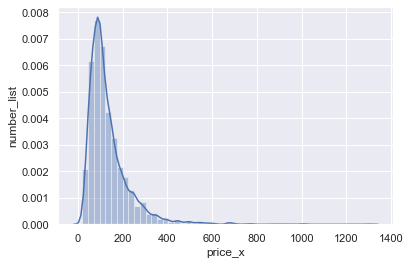

<Figure size 432x288 with 0 Axes>

In [399]:
def dist_plot(name,ylabel,figname):
    '''Plot the number of listings varying with price'''
     
    sns.distplot(name, hist=True, kde=True)
    plt.ylabel(ylabel)
    plt.show()
    plt.savefig(figname)
dist_plot(mean_price,'number_list','price_dist')

In [400]:
# get the number of listing for differnt month
listings_by_month = pd.Series([12])
for i in range(1, 13):
    listings_by_month[i] = len(df_res[(df_res['month'] == i) & (df_res['year'] == 2016)]['listing_id'])
    
listings_by_month = listings_by_month.drop(0)

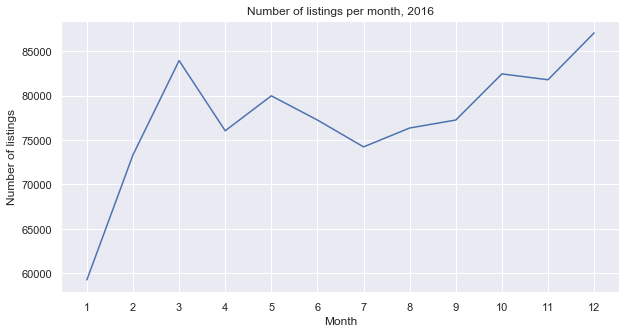

In [401]:
#plot the line graph of  number of listings varying at  different months in 2016
plt.figure(figsize=(10,5))
plt.plot(listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')

plt.savefig('number of available listings.png')

plt.show()

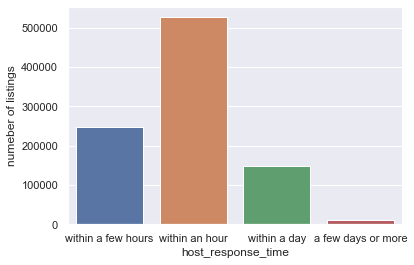

<Figure size 432x288 with 0 Axes>

In [402]:
def count_plot(name,ylabel,figname):
    '''Plot the count of number of listings for different response time'''
    
    sns.countplot(name)
    plt.ylabel(ylabel)
    plt.show()
    plt.savefig(figname)
count_plot(df_res["host_response_time"],'numeber of listings','host_response_time.png')

<font color='blue'>II How the number of listings vary host_response_rate?</font>

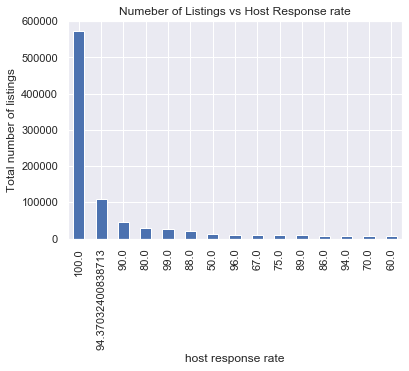

In [403]:
#Had to change the host_response_rate to str inorder to plot it's upper 15 counts.
(df_res['host_response_rate'].astype(str)).value_counts()[:15].plot(kind='bar')
plt.title("Numeber of Listings vs Host Response rate")
plt.ylabel("Total number of listings")
plt.xlabel('host response rate')
plt.savefig('host_response_rate_counts.png')#see the distint rate percentage of host responses rate

<font color='blue'>III What are the factors playing role in delaying the respone by the host?</font>

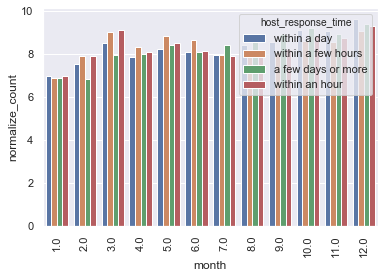

In [404]:
#Group the number of listings at differnt months by host_response_time and make a plot.
#This shows the  variaiton of different host resonse time with months.

response_counts = (df_res.groupby(['host_response_time'])['month']
                     .value_counts(normalize=True)
                     .rename('normalize_count')
                     .mul(100)
                     .reset_index()
                     .sort_values('month'))
# Made a plot of the nurmalize count of different listings with month
p = sns.barplot(x="month",y='normalize_count', hue="host_response_time", data=response_counts)
_ = plt.setp(p.get_xticklabels(),rotation=90) 

In [406]:
# Since we are want to deal with host_response_rate in our linear mode, so drop the host_response_time col
df_mod =df_res.drop(columns=['host_response_time'], axis =1)

In [407]:
#seperate the numerical and categorical columns
df_mod_cat = df_mod.select_dtypes(include='object')
df_mod_num = df_mod.select_dtypes(include=['int', 'float'])

In [408]:
df_mod_cat.columns

Index(['property_type', 'room_type', 'neighbourhood_group_cleansed',
       'smart_location', 'neighbourhood', 'host_is_superhost'],
      dtype='object')

In [409]:
df_mod_num.columns

Index(['accommodates', 'price_x', 'minimum_nights', 'bedrooms',
       'host_acceptance_rate', 'bathrooms', 'beds', 'host_listings_count',
       'maximum_nights', 'host_response_rate', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'cleaning_fee', 'security_deposit', 'month', 'year', 'listing_id'],
      dtype='object')

<font color='blue'>Use of Linear Regression Model for part III</font>

In [410]:
# see the correlation of differnt columns we are interested
df_mod.corr(method='pearson')

,accommodates,price_x,minimum_nights,bedrooms,host_acceptance_rate,bathrooms,beds,host_listings_count,maximum_nights,host_response_rate,availability_30,availability_60,availability_90,availability_365,cleaning_fee,security_deposit,month,year,listing_id
accommodates,1.000000,0.676054,0.015056,0.767538,0.013608,0.515536,0.860047,0.135505,-0.000865,0.014399,-0.024549,-0.029532,-0.040532,-0.053081,0.607635,0.248864,0.008771,0.000627,-0.069936
price_x,0.676054,1.000000,0.012260,0.631540,0.007483,0.524907,0.608799,0.179391,0.010417,0.005352,0.007134,-0.001076,-0.006974,-0.008606,0.619841,0.304740,0.041871,-0.000792,-0.050329
minimum_nights,0.015056,0.012260,1.000000,0.006520,-0.000530,0.002289,-0.002985,0.000095,0.003656,0.009728,0.014131,0.011356,0.010401,0.007156,0.020097,0.010085,-0.000667,-0.000120,-0.021757
bedrooms,0.767538,0.631540,0.006520,1.000000,0.006432,0.598777,0.746805,0.088555,-0.006615,-0.001227,-0.032870,-0.044512,-0.057393,-0.047027,0.589777,0.294987,0.023165,0.002851,-0.059894
host_acceptance_rate,0.013608,0.007483,-0.000530,0.006432,1.000000,0.008831,0.012911,0.005720,-0.006529,-0.009345,-0.017103,-0.015114,-0.013899,-0.012863,0.019423,0.019909,0.000236,0.000085,0.005033
bathrooms,0.515536,0.524907,0.002289,0.598777,0.008831,1.000000,0.504224,0.085213,-0.017188,0.020067,-0.007772,-0.011098,-0.015647,0.008121,0.476160,0.240454,0.021555,0.002290,-0.053978
beds,0.860047,0.608799,-0.002985,0.746805,0.012911,0.504224,1.000000,0.109914,-0.003690,0.019376,-0.005933,-0.014307,-0.024930,-0.028360,0.585685,0.253711,0.013075,0.000787,-0.046270
host_listings_count,0.135505,0.179391,0.000095,0.088555,0.005720,0.085213,0.109914,1.000000,0.043287,0.028892,0.097821,0.104033,0.103950,0.065237,0.188746,0.006863,-0.019604,-0.004729,-0.015621
maximum_nights,-0.000865,0.010417,0.003656,-0.006615,-0.006529,-0.017188,-0.003690,0.043287,1.000000,-0.032980,0.012019,-0.007645,-0.006527,0.005344,-0.004999,0.015841,0.005921,0.001086,0.154526
host_response_rate,0.014399,0.005352,0.009728,-0.001227,-0.009345,0.020067,0.019376,0.028892,-0.032980,1.000000,-0.040800,-0.034085,-0.031119,-0.070930,-0.048825,-0.039252,-0.014844,-0.001023,-0.023344


In [414]:
#make dummy to the objects of  categorical columns for using the linear model
df_mod_dum = pd.get_dummies(df_mod, columns =df_mod_cat.columns)

In [415]:
#Define x and y
y = df_mod_dum['host_response_rate']
x= df_mod_dum.drop(columns=['host_response_rate'], axis =1)

In [416]:
#split into train and test values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=42)
#define the linear model
slr = LinearRegression()
#fit the training values with linear model
slr.fit(X_train, y_train)
#Try to predict the values from our fit model.
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
rsquared_score = r2_score(y_test, y_test_pred)
length_y_test = len(y_test)

In [417]:

rsquared_score, length_y_test

(0.10890818361353194, 140182)

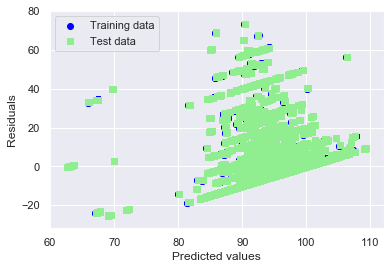

In [418]:
# see how the residuals change  with train or test value by making the scatter plot
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.savefig('ResidualvsPredicted.png')
plt.show()